## OBJECTIVES

#### `Predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs` 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cc=pd.read_csv(r'D:\GITHUB-KAGGLE\KAGGLE\telephone churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')
cc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Exploration

In [5]:
cc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### No null values are present in the dataset

In [6]:
cc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


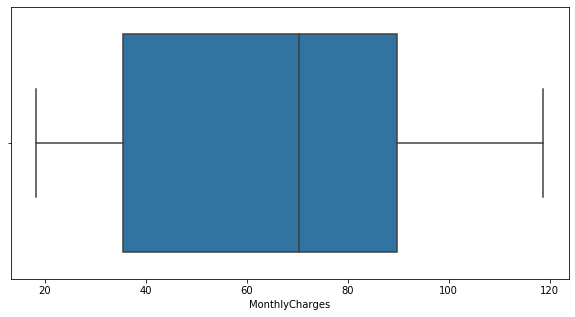

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(cc['MonthlyCharges'])
plt.show()

#### There is no significant Outliers in the dataset

### Finding the Percentage of customers who churned over last year

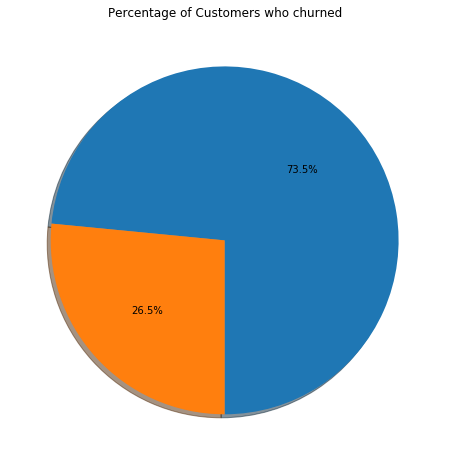

In [92]:
plt.figure(figsize=(10,8))
sizes = cc['Churn'].value_counts(sort = True)
plt.pie(sizes,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Customers who churned')
plt.show()

#### 26.5% of customers churned in the given dataset

### Dropping Irrelevant data

In [50]:
cc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
cc.drop(['customerID','PaperlessBilling','OnlineSecurity','OnlineBackup','DeviceProtection'], axis=1, inplace= True)
cc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,No,No,No,One year,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


### Converting Numerical data from object type data

In [52]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Partner          7043 non-null   object 
 3   Dependents       7043 non-null   object 
 4   tenure           7043 non-null   int64  
 5   PhoneService     7043 non-null   object 
 6   MultipleLines    7043 non-null   object 
 7   InternetService  7043 non-null   object 
 8   TechSupport      7043 non-null   object 
 9   StreamingTV      7043 non-null   object 
 10  StreamingMovies  7043 non-null   object 
 11  Contract         7043 non-null   object 
 12  PaymentMethod    7043 non-null   object 
 13  MonthlyCharges   7043 non-null   float64
 14  TotalCharges     7043 non-null   object 
 15  Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 880.5+ KB


In [60]:
cc.shape

(7043, 16)

#### It is found that 'Total charges, is an object which shall be converted to a numerical data type

In [70]:
cc['TotalCharges'].head(20)

0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19     1862.9
Name: TotalCharges, dtype: object

In [76]:
cc['TotalCharges']=pd.to_numeric(cc['TotalCharges'], errors='coerce').fillna(0, downcast='infer')
cc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Partner          7043 non-null   object 
 3   Dependents       7043 non-null   object 
 4   tenure           7043 non-null   int64  
 5   PhoneService     7043 non-null   object 
 6   MultipleLines    7043 non-null   object 
 7   InternetService  7043 non-null   object 
 8   TechSupport      7043 non-null   object 
 9   StreamingTV      7043 non-null   object 
 10  StreamingMovies  7043 non-null   object 
 11  Contract         7043 non-null   object 
 12  PaymentMethod    7043 non-null   object 
 13  MonthlyCharges   7043 non-null   float64
 14  TotalCharges     7043 non-null   float64
 15  Churn            7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory usage: 880.5+ KB


### Data Analysis

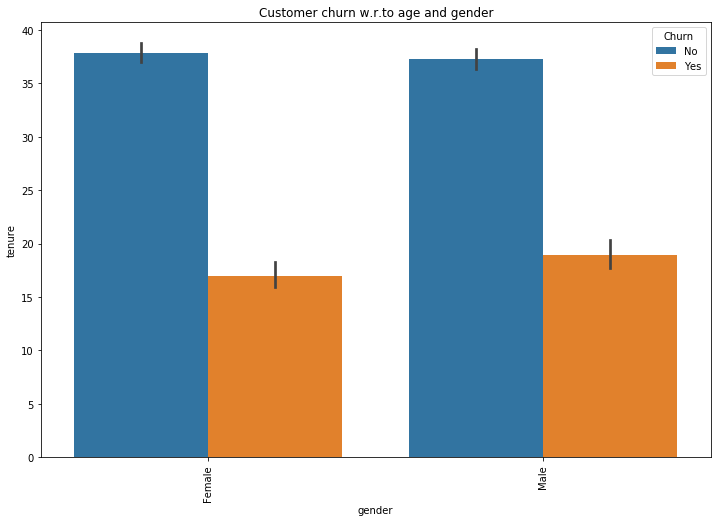

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(data =cc, x='gender',y='tenure',hue='Churn')
plt.title('Customer churn w.r.to age and gender')
plt.xticks(rotation=90)
plt.show()

#### From the above graph we can infer that,
a) `The customer churn is not gender based`

b) `The more the tenure period, the less likely the customer is to churn`

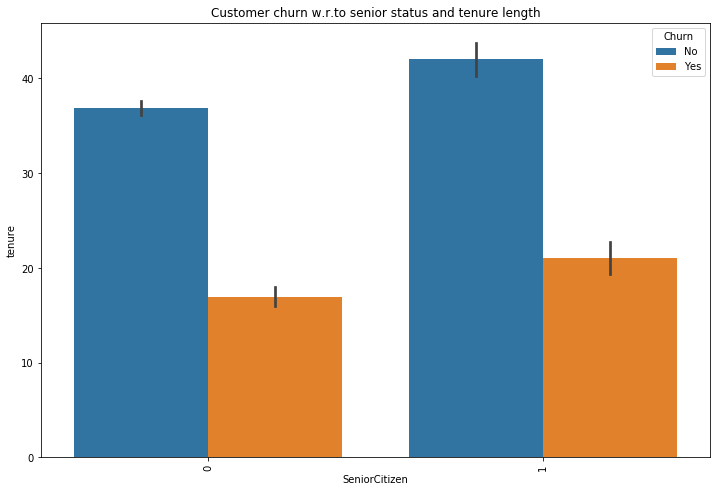

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(data =cc, x='SeniorCitizen',y='tenure',hue='Churn')
plt.title('Customer churn w.r.to senior status and tenure length')
plt.xticks(rotation=90)
plt.show()